In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [2]:
# Importing data
df = pd.read_csv('data/ohare.csv', index_col=0)

In [3]:
# Dropping average temperature column as there are too many invalid entries
df = df.drop('TAVG (Degrees Fahrenheit)', axis=1)
# Dropping remaining NaN entries
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23892 entries, 1958-11-01 to 2025-06-21
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TMAX (Degrees Fahrenheit)  23892 non-null  float64
 1   TMIN (Degrees Fahrenheit)  23892 non-null  float64
 2   PRCP (Inches)              23892 non-null  float64
 3   SNOW (Inches)              23892 non-null  float64
 4   SNWD (Inches)              23892 non-null  float64
dtypes: float64(5)
memory usage: 1.1+ MB


In [4]:
df.head()

,TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches)
Date,,,,,
1958-11-01,54.0,40.0,0.0,0.0,0.0
1958-11-02,53.0,37.0,0.0,0.0,0.0
1958-11-03,60.0,34.0,0.0,0.0,0.0
1958-11-04,68.0,41.0,0.0,0.0,0.0
1958-11-05,58.0,38.0,0.0,0.0,0.0


In [5]:
# Creating 'irrigation' column based on generalized rule of needing 8 gpm/acre* for irrigation, which is equivalent to 0.42 inches of rain per day
# If natural rainfall surpasses this threshold, irrigation is not needed
# gpm/acre stands for "gallons per minute, per acre"
df['irrigation'] = df['PRCP (Inches)'] <= 0.42
df['irrigation'] = df['irrigation'].astype(int)
df

,TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches),irrigation
Date,,,,,,
1958-11-01,54.0,40.0,0.00,0.0,0.0,1
1958-11-02,53.0,37.0,0.00,0.0,0.0,1
1958-11-03,60.0,34.0,0.00,0.0,0.0,1
1958-11-04,68.0,41.0,0.00,0.0,0.0,1
1958-11-05,58.0,38.0,0.00,0.0,0.0,1
...,...,...,...,...,...,...
2025-06-17,92.0,71.0,0.30,0.0,0.0,1
2025-06-18,81.0,66.0,1.86,0.0,0.0,0
2025-06-19,85.0,65.0,0.00,0.0,0.0,1


In [6]:
df.describe()

,TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches),irrigation
count,23892.000000,23892.000000,23892.000000,23892.000000,23892.000000,23892.000000
mean,59.294827,40.950946,0.099909,0.104730,0.507551,0.925456
std,21.513276,19.286985,0.293293,0.612114,1.929043,0.262659
min,-11.000000,-27.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,28.000000,0.000000,0.000000,0.000000,1.000000
50%,62.000000,41.000000,0.000000,0.000000,0.000000,1.000000
75%,78.000000,57.000000,0.040000,0.000000,0.000000,1.000000
max,104.000000,83.000000,6.860000,18.600000,28.000000,1.000000


In [7]:
df['irrigation'].value_counts()

irrigation
1    22111
0     1781
Name: count, dtype: int64

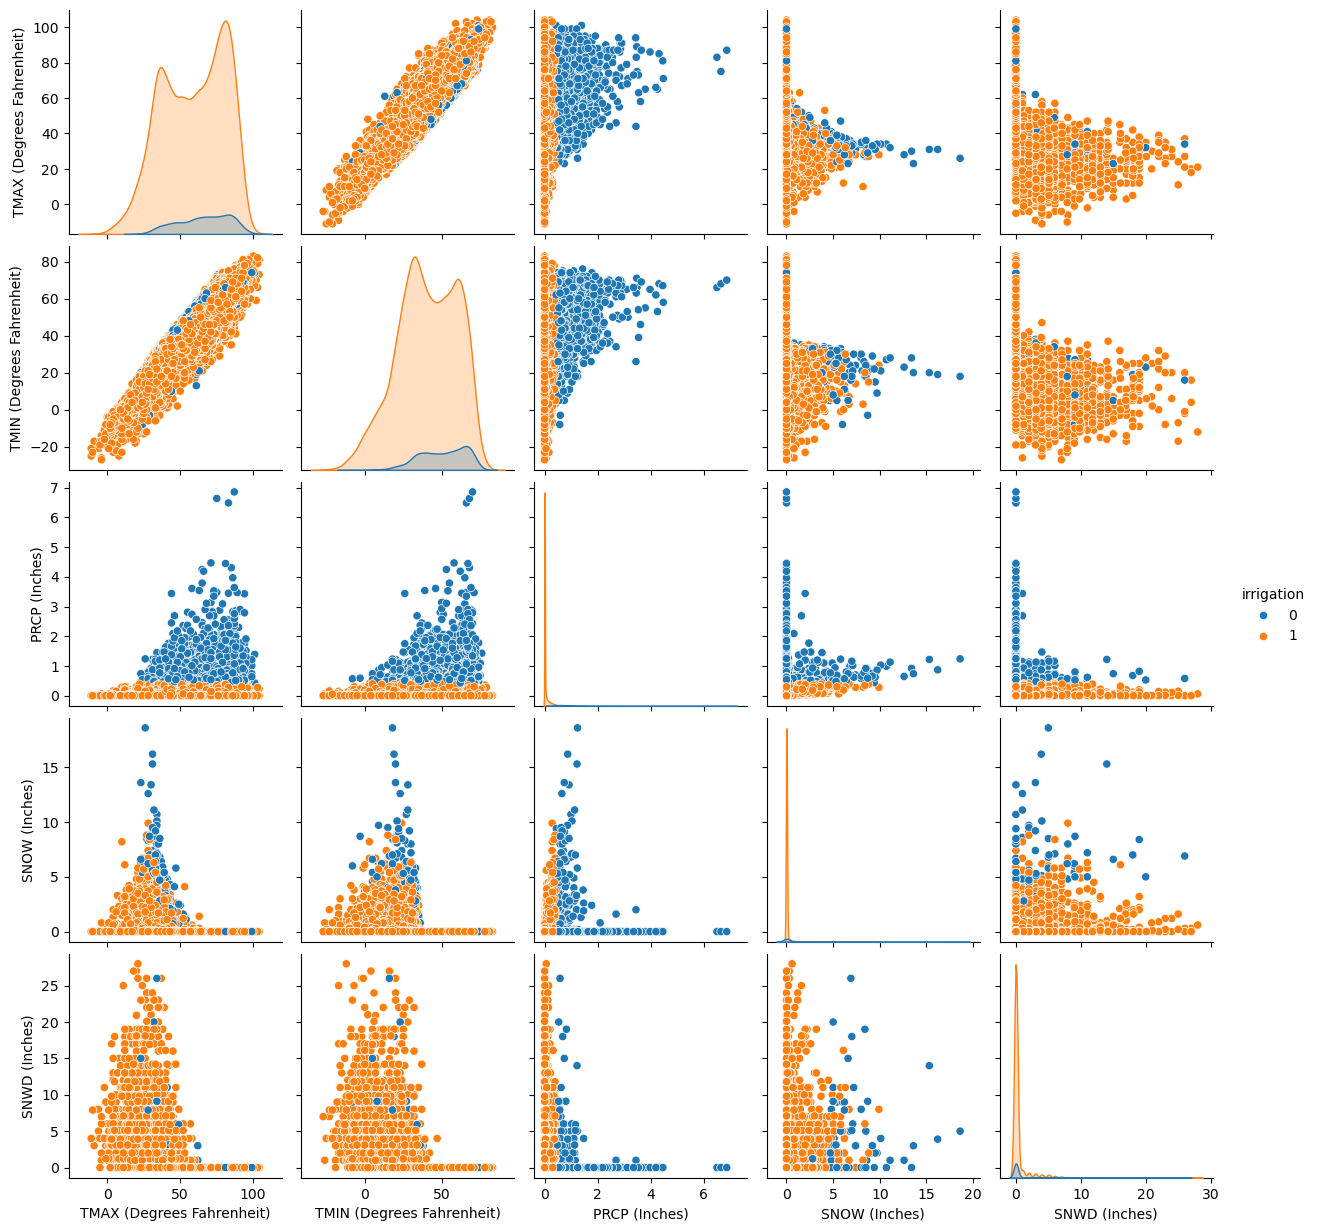

In [8]:
sns.pairplot(df, hue='irrigation')

In [9]:
# Splitting features and output
X, y = df.drop('irrigation', axis=1), df['irrigation']

In [10]:
# Creating training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
# Creating dummy baseline classifier that assumes irrigation is required every day
dummy = Pipeline([
    ('scaler', StandardScaler()),
    ('dummy', DummyClassifier(strategy='most_frequent'))
]).fit(X_train, y_train)
dummy_predictions = dummy.predict(X_test)
dummy_score = dummy.score(X_test, y_test)
dummy_score

0.9264787946428571

In [12]:
# Creating a baseline Logistic Regression model with default hyperparameters
lgr = Pipeline([
    ('scaler', StandardScaler()),
    ('lgr', LogisticRegression())
]).fit(X_train, y_train)
lgr_predictions = lgr.predict(X_test)
lgr_score = lgr.score(X_test, y_test)
lgr_score

1.0